<a href="https://colab.research.google.com/github/petaykina/apetaykina/blob/main/apetaykina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Даем доступ для нашего .ipynb файла к GoogleDrive

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Создаем dataframe с именем df

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('gdrive/MyDrive/exams.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


Собираем информацию о названии колонок нашего df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Проверяем пропуски - пропусков нет

In [5]:
df.isnull().values.any()

False

Смотрим размер массива - 1000 строк, 8 колонок

In [6]:
print (df.shape)

(1000, 8)


Статистика сдачи трех видов экзаменов: мин, макс, квантили, среднее, стдантартное отклоенине

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


Предположим, что проходной бал экзамена по математике = 75, тогда можно вывести статистику, сколько людей сдало тест P и сколько - нет F

In [8]:
passmark = 75
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

F    684
P    316
Name: Math_PassStatus, dtype: int64

Визуализируем, какое предыдущее образование у сдавших и несдавших

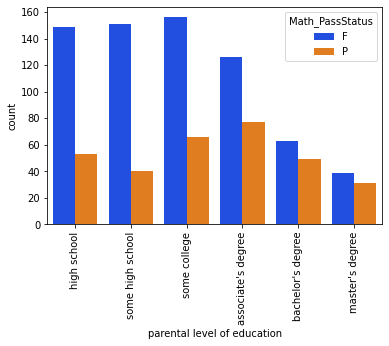

In [9]:
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

Смотрим, насколько коррелируют успеваемости в разных категориях (парная линейная связь) + Heatmap

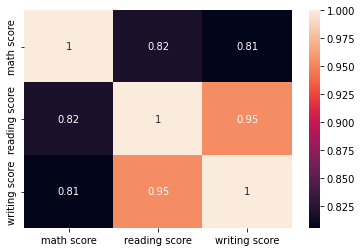

In [10]:
sns.heatmap(df.corr(), annot=True)
plt.show()

Выводим названия колонок

In [11]:
for i,col in enumerate(df.columns):
    print(i,". column is ",col)

0 . column is  gender
1 . column is  race/ethnicity
2 . column is  parental level of education
3 . column is  lunch
4 . column is  test preparation course
5 . column is  math score
6 . column is  reading score
7 . column is  writing score
8 . column is  Math_PassStatus


Пример переименования колонок

In [12]:
df.rename(columns=({'gender':'Gender','race/ethnicity':'Race/Ethnicity'
                     ,'parental level of education':'Parental_Level_of_Education'
                     ,'lunch':'Lunch','test preparation course':'Test_Preparation_Course'
                      ,'math score':'Math_Score','reading score':'Reading_Score'
                     ,'writing score':'Writing_Score'}),inplace=True)

Подсчитываем, сколько было в выборке мужчин и женщин

In [13]:
df['Gender'].value_counts()

male      517
female    483
Name: Gender, dtype: int64

Группировка по этническим группам. Средний балл в каждой этнической группе по различным типам экзаменов

In [14]:
list = ['Writing_Score', 'Reading_Score', 'Math_Score']
df.groupby('Race/Ethnicity')[list].mean()

,Writing_Score,Reading_Score,Math_Score
Race/Ethnicity,,,
group A,66.974684,68.556962,65.215190
group B,65.736585,67.102439,63.170732
group C,64.523220,66.383901,63.130031
group D,72.259542,72.087786,69.267176
group E,70.213740,72.526718,74.465649


Визуализация частоты результатов по экзаменам

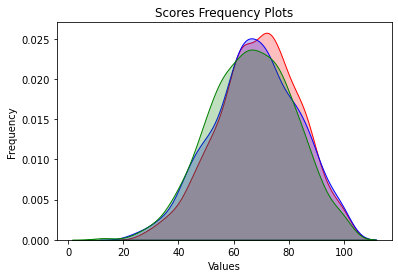

In [15]:
sns.kdeplot(df['Reading_Score'],shade=True,color='r')
sns.kdeplot(df['Writing_Score'],shade=True,color='b')
sns.kdeplot(df['Math_Score'],shade=True,color='g')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Scores Frequency Plots')
plt.show()

Boxplot результатов Math_Score по этническим группам в разрезе гендерной принадлежности

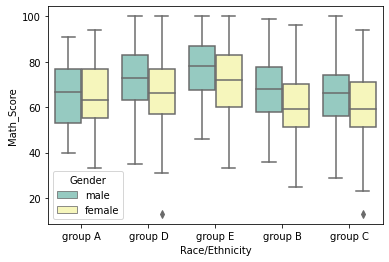

In [16]:
sns.boxplot(x=df['Race/Ethnicity'],y=df['Math_Score'],hue=df['Gender'],palette="Set3")
plt.show()

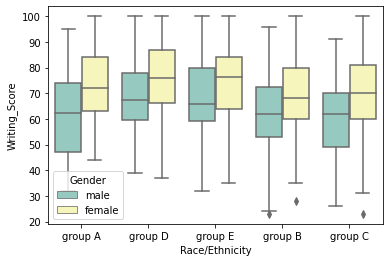

In [18]:
sns.boxplot(x=df['Race/Ethnicity'],y=df['Writing_Score'],hue=df['Gender'],palette="Set3")
plt.show()

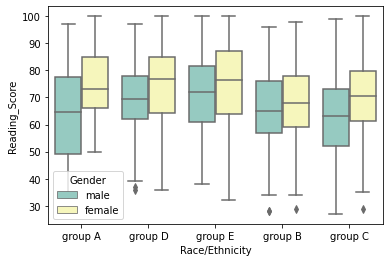

In [19]:
sns.boxplot(x=df['Race/Ethnicity'],y=df['Reading_Score'],hue=df['Gender'],palette="Set3")
plt.show()

Частотная статистика и визуализация линейной связи в парных результатах экзаменов

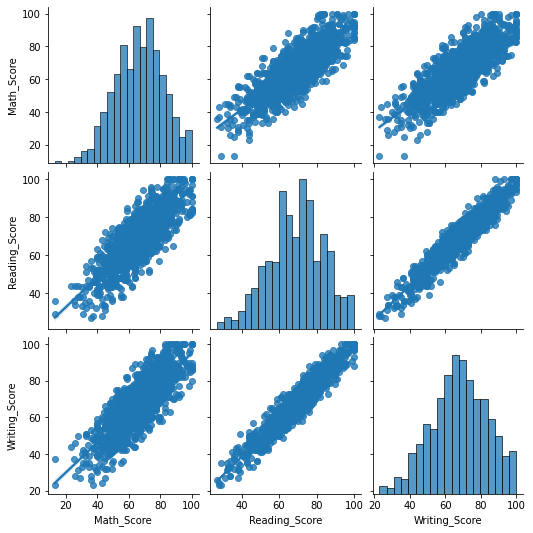

In [17]:
sns.pairplot(df,kind='reg')
plt.show()